In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.cm import ScalarMappable

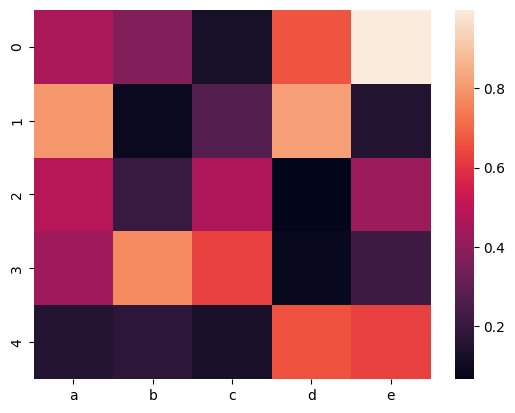

In [2]:
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

p1 = sns.heatmap(df)

<Axes: >

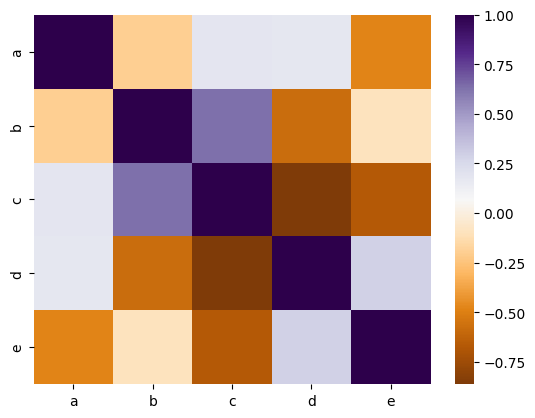

In [3]:
# 변수간 상관관계
corr_matrix=df.corr()
 
sns.heatmap(corr_matrix, cmap='PuOr')

<Axes: >

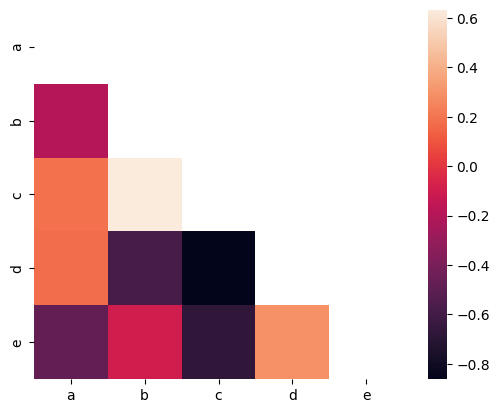

In [4]:
# 상삼각행렬을 보이지 않기 위해 마스크로 덮어씌우기
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True)

,feature,people,value
0,1,A,0.451380
1,2,A,0.176990
2,3,A,0.850054
3,4,A,0.938720
4,5,A,0.603422


feature,1,2,3,4,5
people,,,,,
A,0.451380,0.176990,0.850054,0.938720,0.603422
B,0.294490,0.709277,0.833512,0.933075,0.027465
C,0.709996,0.705841,0.533567,0.502676,0.846153
D,0.421799,0.855725,0.277354,0.050554,0.478578
E,0.535827,0.637194,0.533634,0.446092,0.271760


<Axes: xlabel='feature', ylabel='people'>

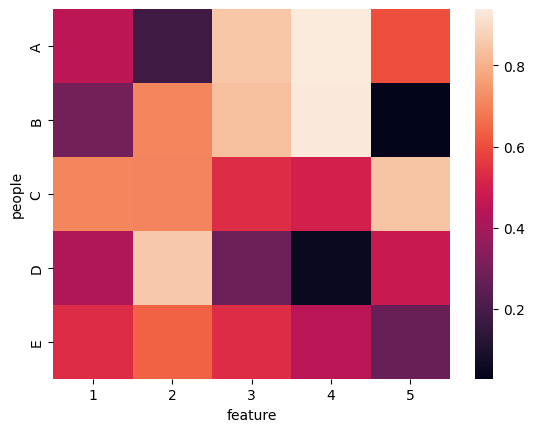

In [10]:
people = np.repeat(("A","B","C","D","E"),5)
feature = list(range(1,6))*5
value = np.random.random(25)

df = pd.DataFrame({'feature': feature, 
                   'people': people, 
                   'value': value })
display(df.head())
# Turn long format into a wide format
df_wide = df.pivot_table( index='people', 
                         columns='feature', 
                         values='value')
display(df_wide)
# plot it
sns.heatmap(df_wide)

<Axes: >

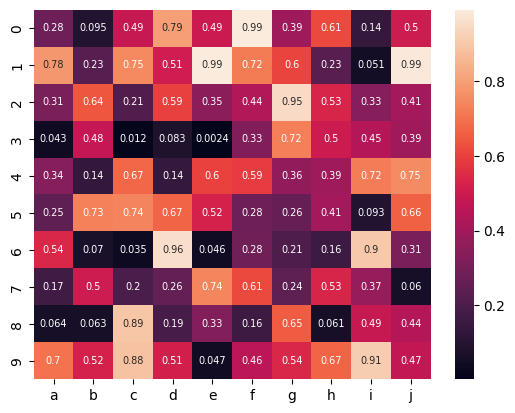

In [11]:
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])

sns.heatmap(df, annot=True, annot_kws={"size": 7})

<Axes: >

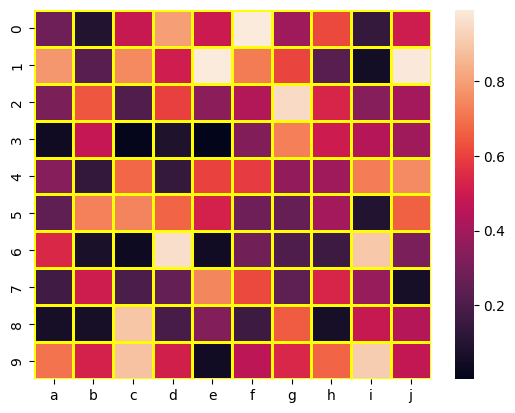

In [12]:
# 격자무늬 띄우기
sns.heatmap(df, linewidths=2, linecolor='yellow')

<Axes: >

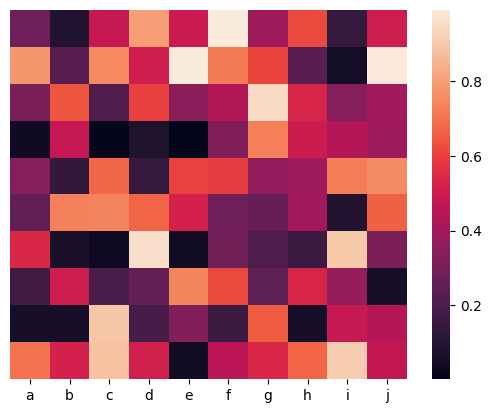

In [13]:
# y축 없애기
sns.heatmap(df, yticklabels=False)

<Axes: >

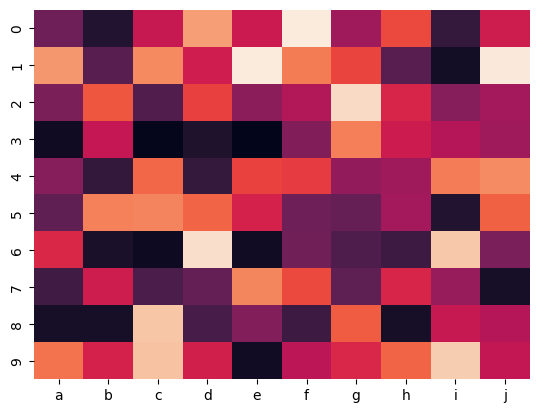

In [14]:
# color bar 없애기
sns.heatmap(df, cbar=False) 

<Axes: >

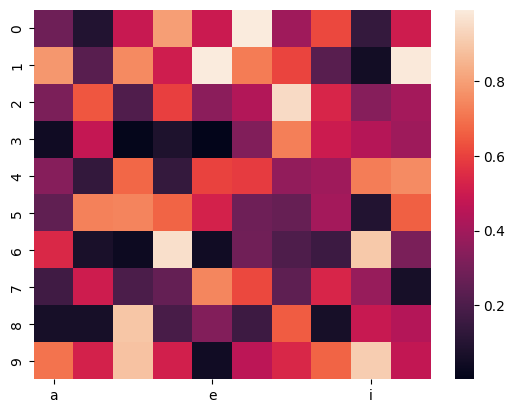

In [15]:
# x축 4개마다 나오게 하기
sns.heatmap(df, xticklabels=4)

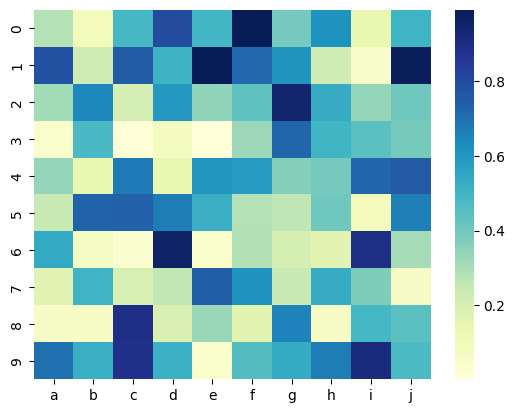

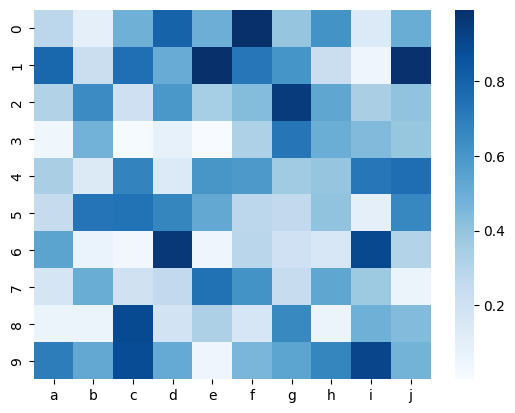

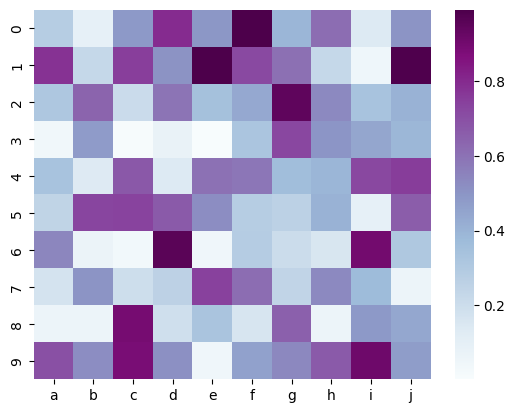

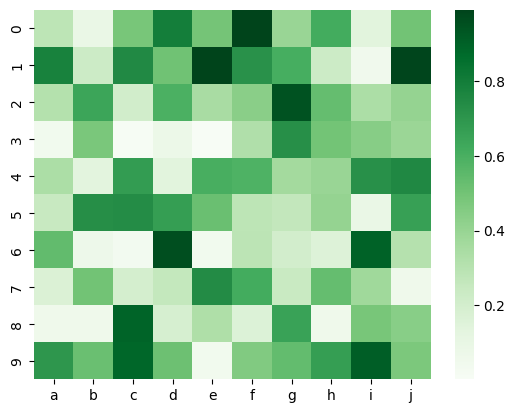

In [17]:
sns.heatmap(df, cmap="YlGnBu")
plt.show()

sns.heatmap(df, cmap="Blues")
plt.show()

sns.heatmap(df, cmap="BuPu")
plt.show()

sns.heatmap(df, cmap="Greens")
plt.show()

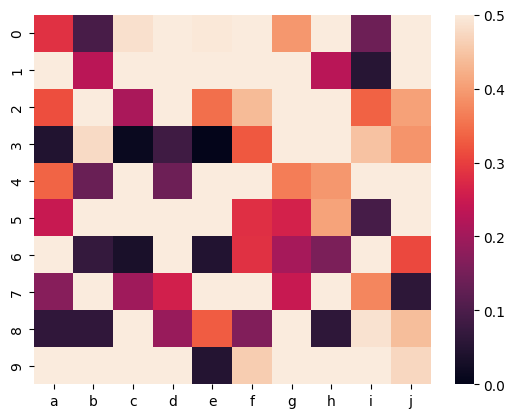

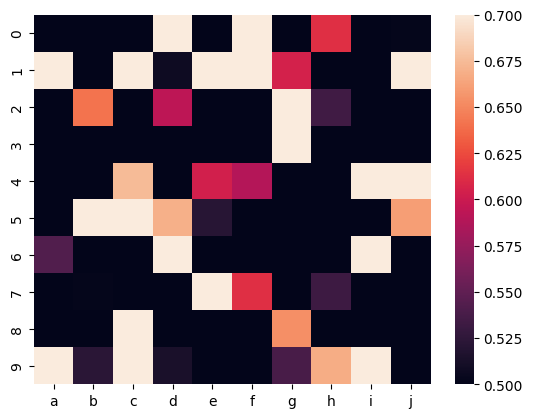

In [18]:
# threshold를 지정하여 해당 수치만 보이게하고 
# 그 이외의 수치들은 threshold 이전 이후로 나타나게 하기
sns.heatmap(df, vmin=0, vmax=0.5)
plt.show()

sns.heatmap(df, vmin=0.5, vmax=0.7)
plt.show()

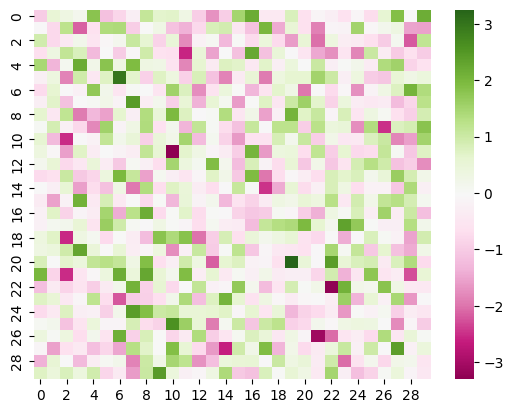

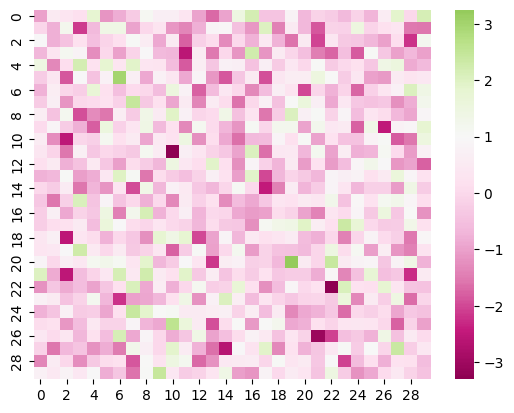

In [19]:
# pallete로 색상 변경
df = np.random.randn(30, 30)
 
sns.heatmap(df, cmap="PiYG")
plt.show()


# center로 중앙값 지정
sns.heatmap(df, cmap="PiYG", center=1)
plt.show()

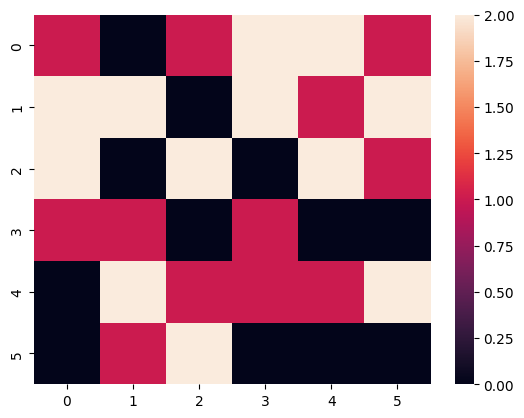

In [20]:
# 이산변수들에 대한 히트맵
df = pd.DataFrame(np.random.randn(6, 6))

df_q = pd.DataFrame()
for col in df:
    df_q[col] = pd.to_numeric(pd.qcut(df[col], 3, labels=list(range(3))) )

sns.heatmap(df_q)
plt.show()

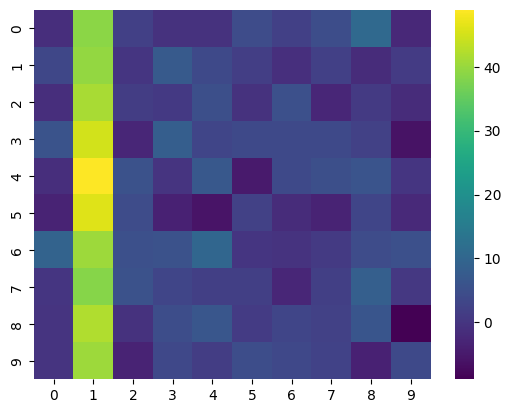

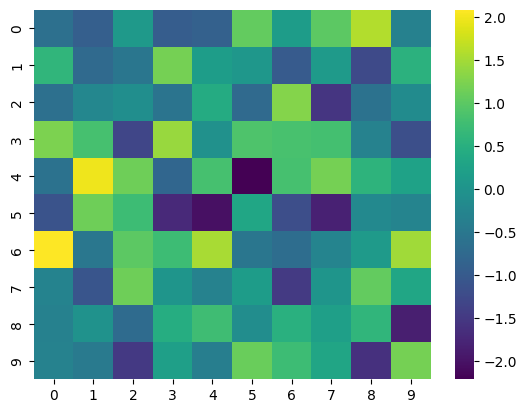

In [21]:
df = pd.DataFrame(np.random.randn(10,10) * 4 + 3)
df[1]=df[1]+40

# 정규화 전
sns.heatmap(df, cmap='viridis')
plt.show()

# 정규화 후
df_norm_col=(df-df.mean())/df.std()
sns.heatmap(df_norm_col, cmap='viridis')
plt.show()

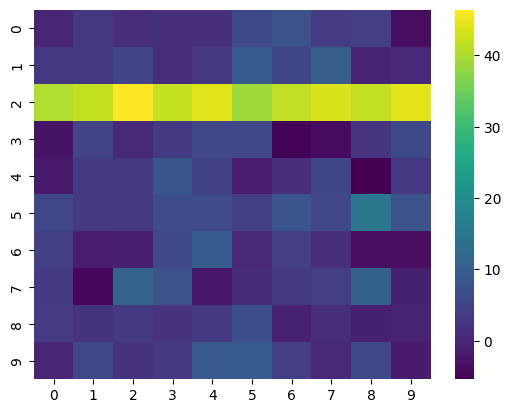

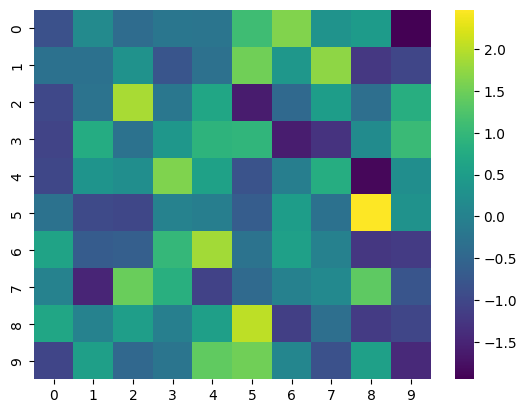

In [22]:
df = pd.DataFrame(np.random.randn(10,10) * 4 + 3)
df.iloc[2]=df.iloc[2]+40

# 정규화 전
sns.heatmap(df, cmap='viridis')
plt.show()
 
# 정규화 후
df_norm_row = df.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
 
sns.heatmap(df_norm_row, cmap='viridis')
plt.show()

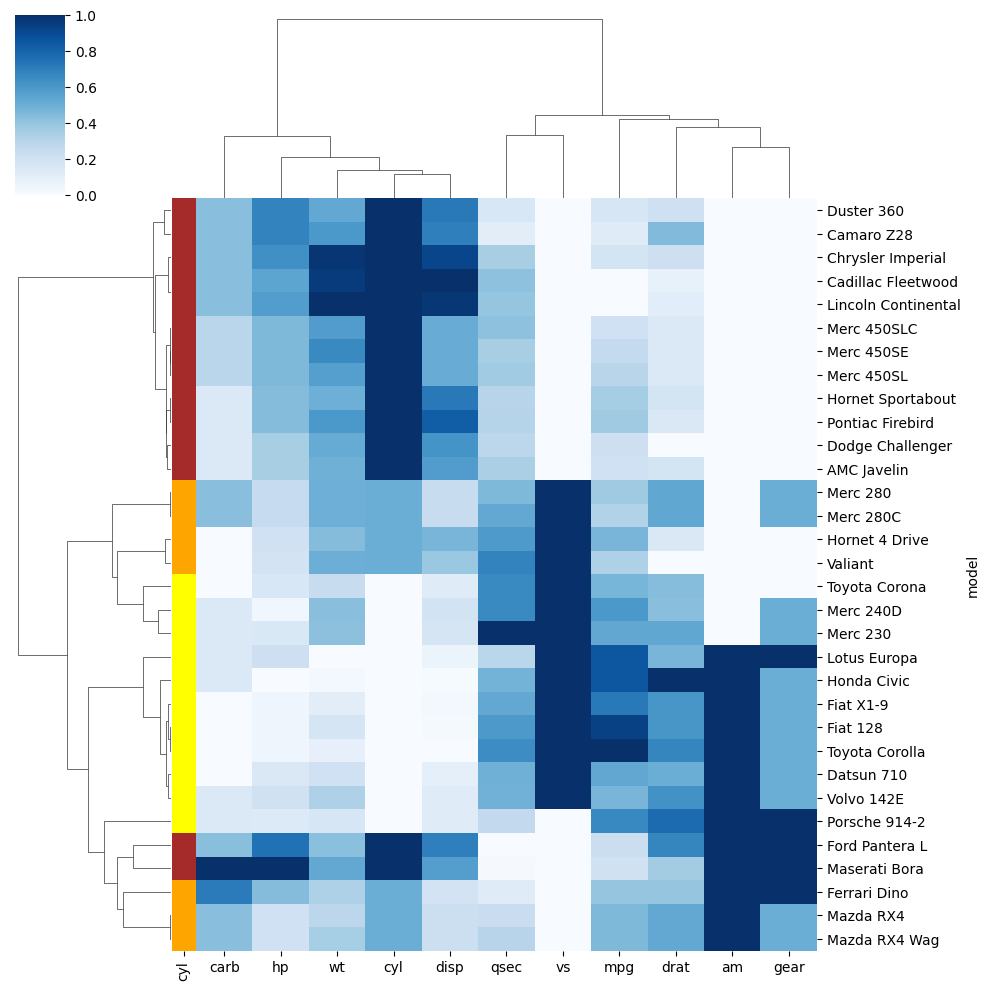

In [25]:
# mtcars dataset
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')

# cyl(실린더) 개수로 좌측에 주황/노랑/갈색으로 표현
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)
 
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)
plt.show()

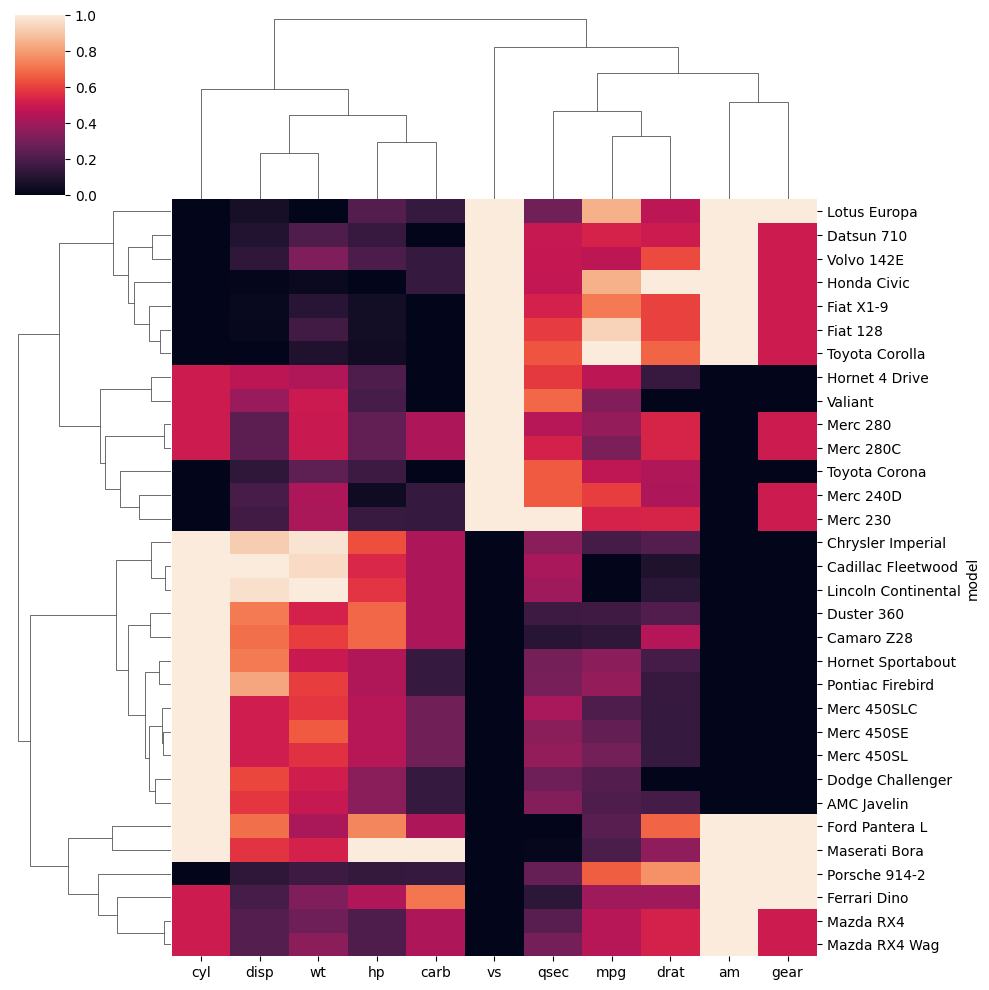

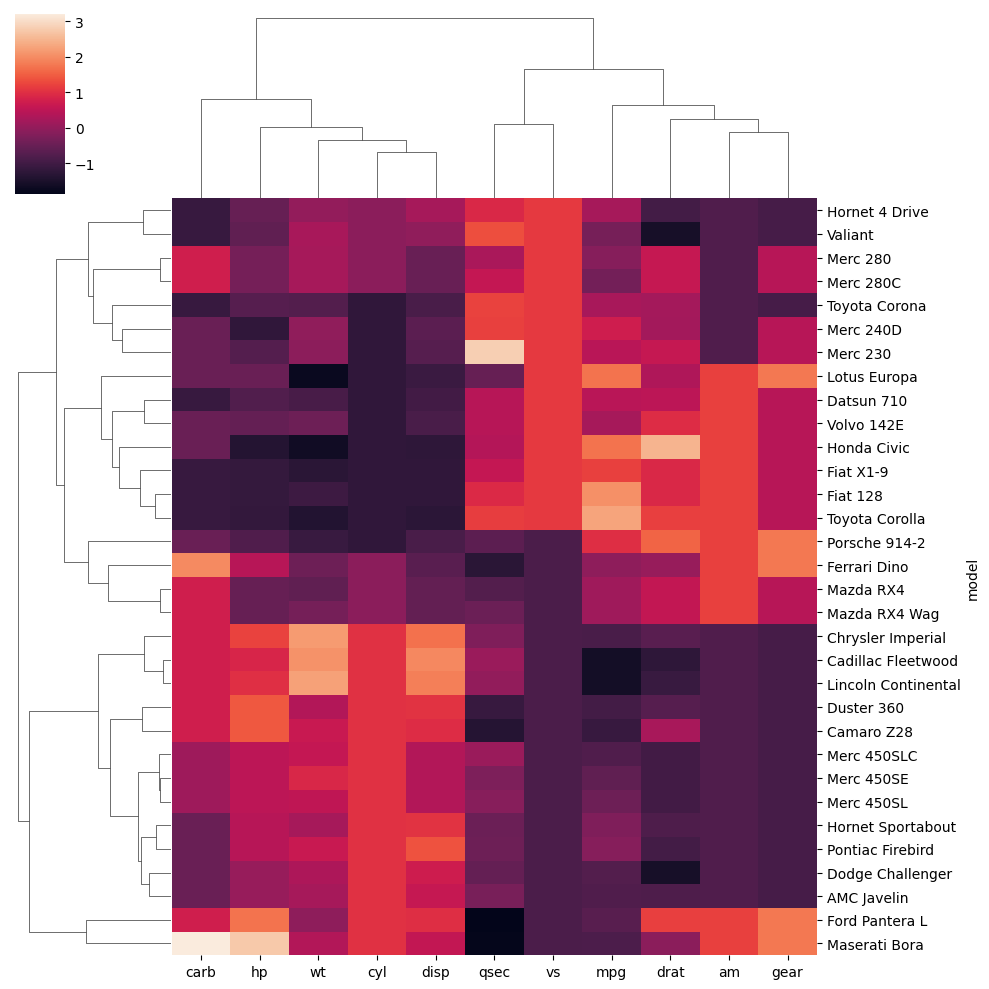

In [27]:
# 0 : 행 / 1 : 열
# 표준화 
sns.clustermap(df, standard_scale=1)
plt.show()

# 정규화
sns.clustermap(df, z_score=1)
plt.show()

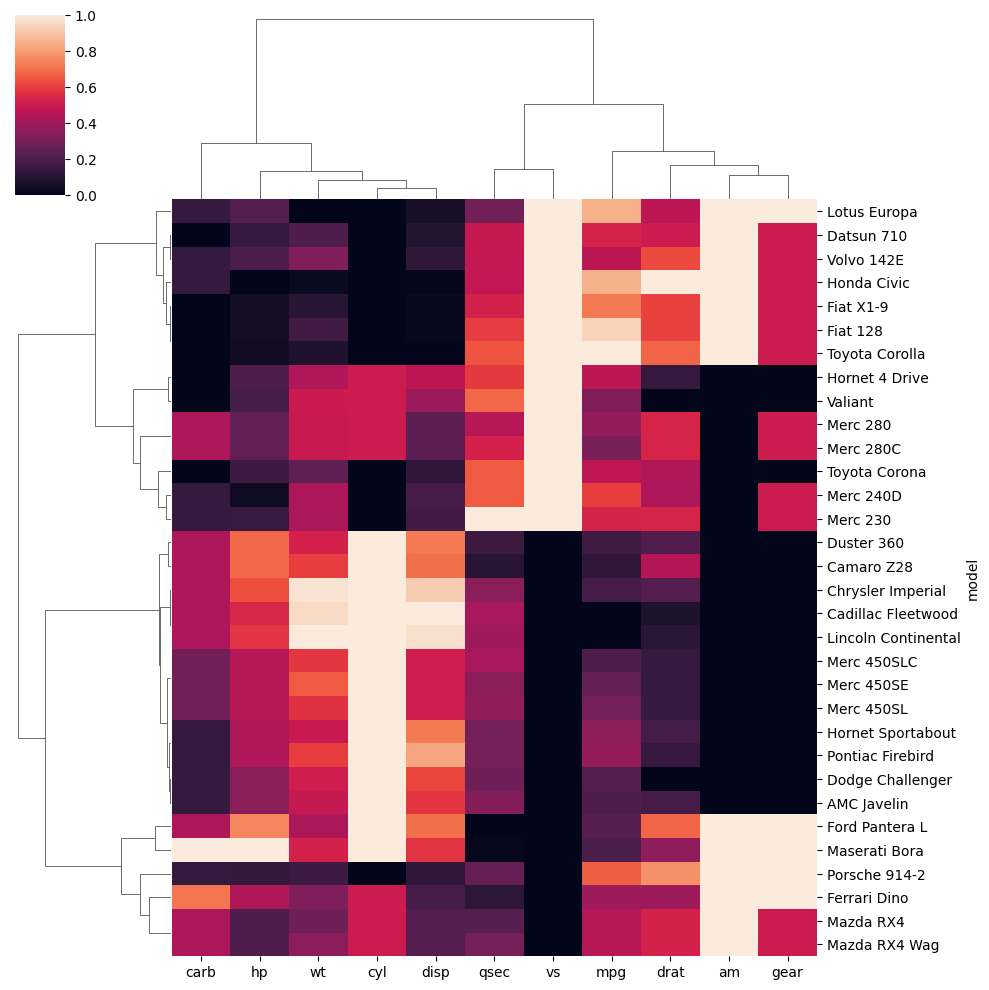

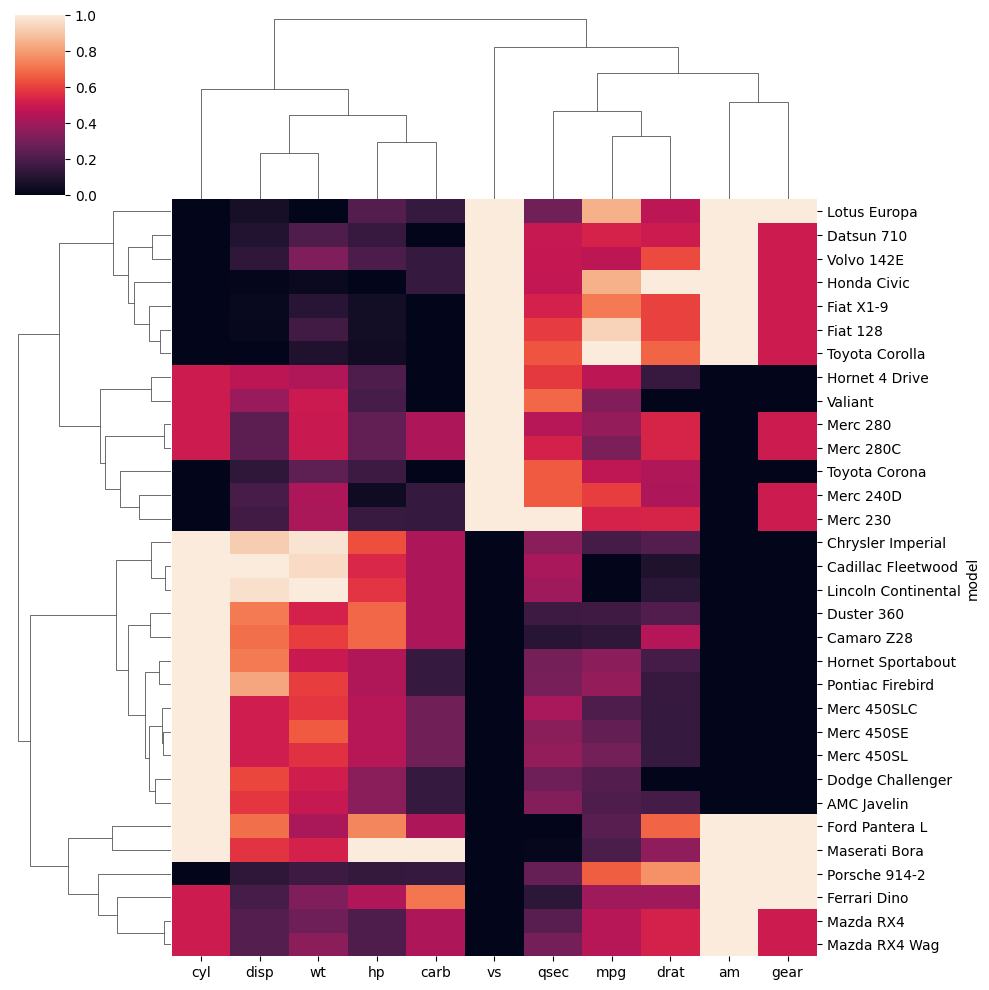

In [28]:
# 상관관계
sns.clustermap(df, metric="correlation", standard_scale=1)
plt.show()

# 유클리디안
sns.clustermap(df, metric="euclidean", standard_scale=1)
plt.show()

In [ ]:
# single 연결법 (유클리드 제겁 거리 기반)
sns.clustermap(df, metric="euclidean", standard_scale=1, method="single")
plt.show()

# ward 연결법 (오차 제곱 합 기반)
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward")
plt.show()

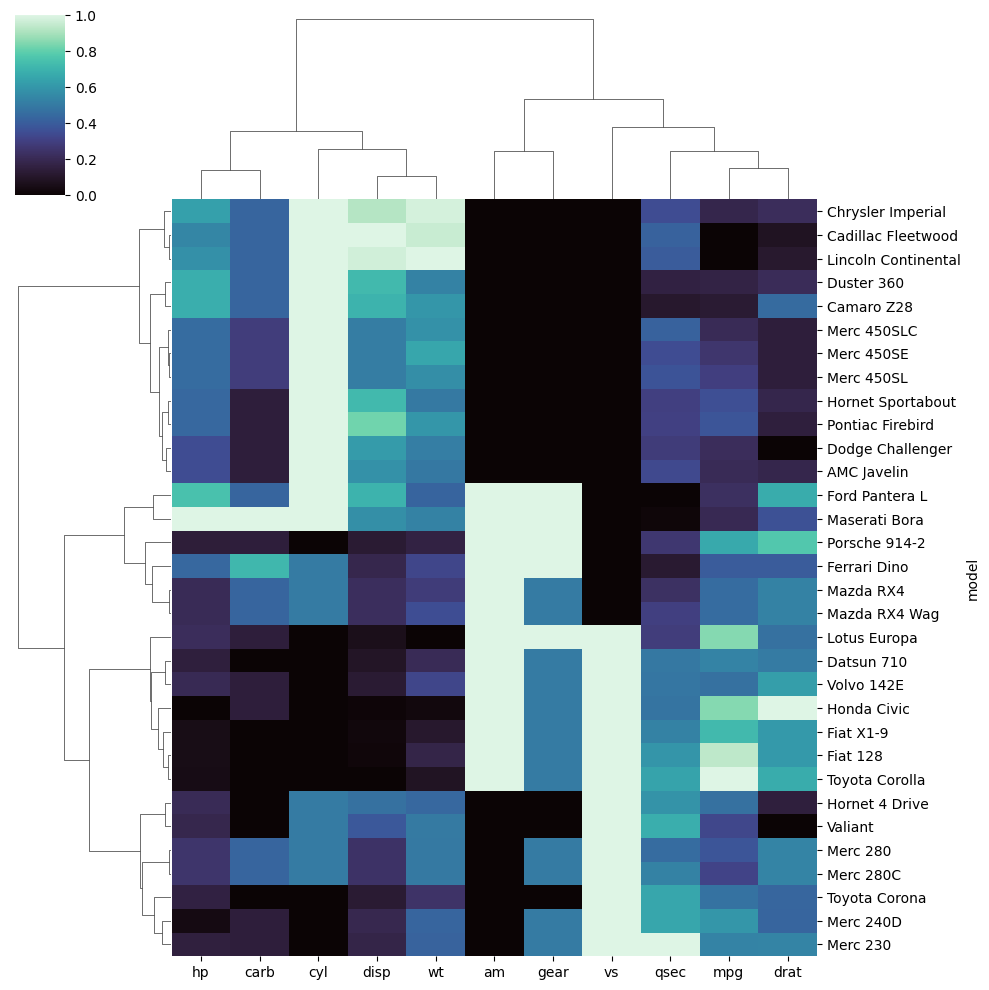

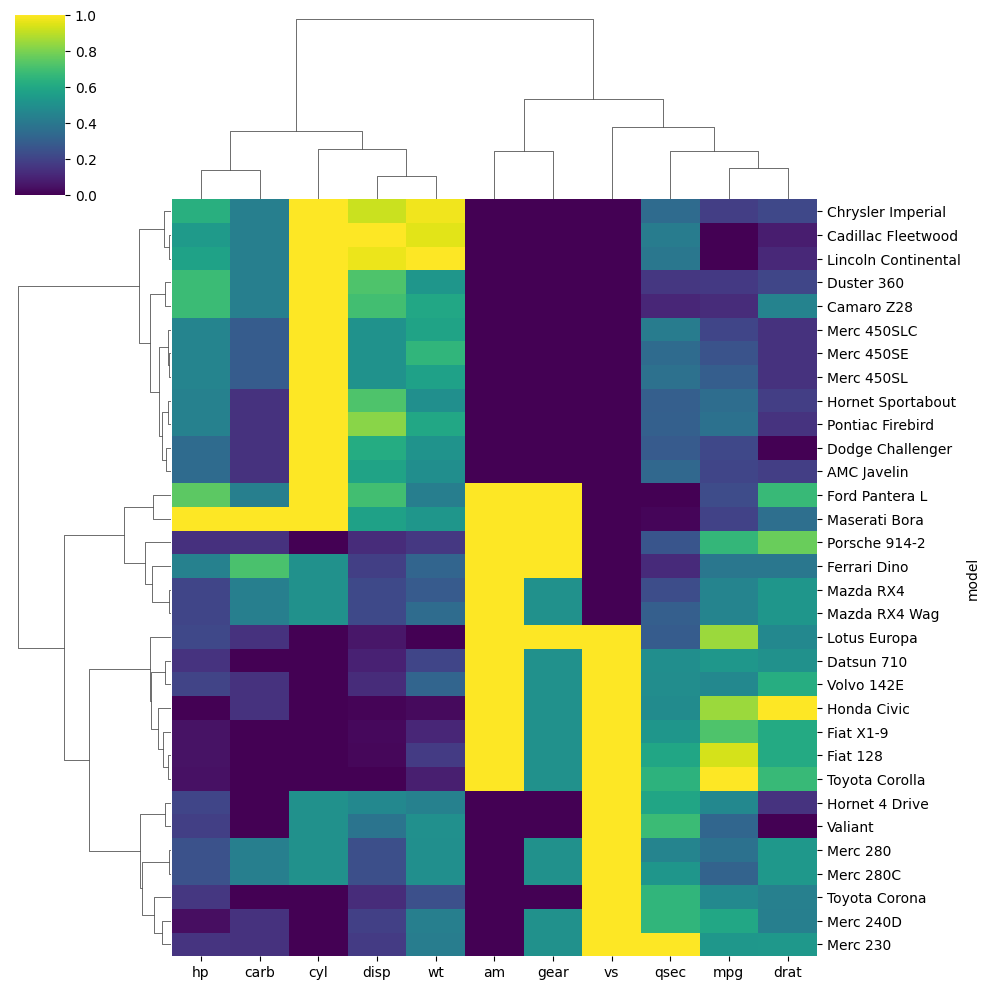

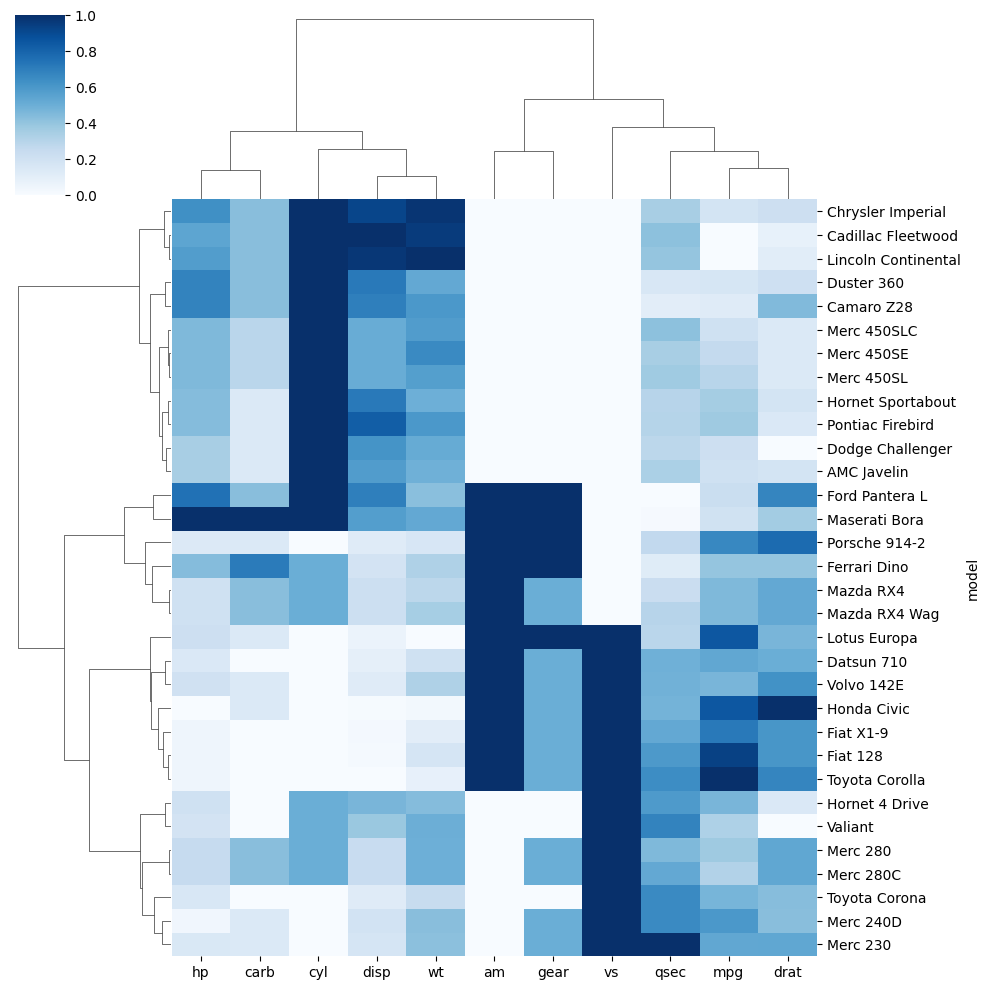

In [29]:
# palette 변경
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="mako")
plt.show()
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="viridis")
plt.show()
sns.clustermap(df, metric="euclidean", standard_scale=1, method="ward", cmap="Blues")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_28904\785067033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drat'].iloc[15:16] = 1000


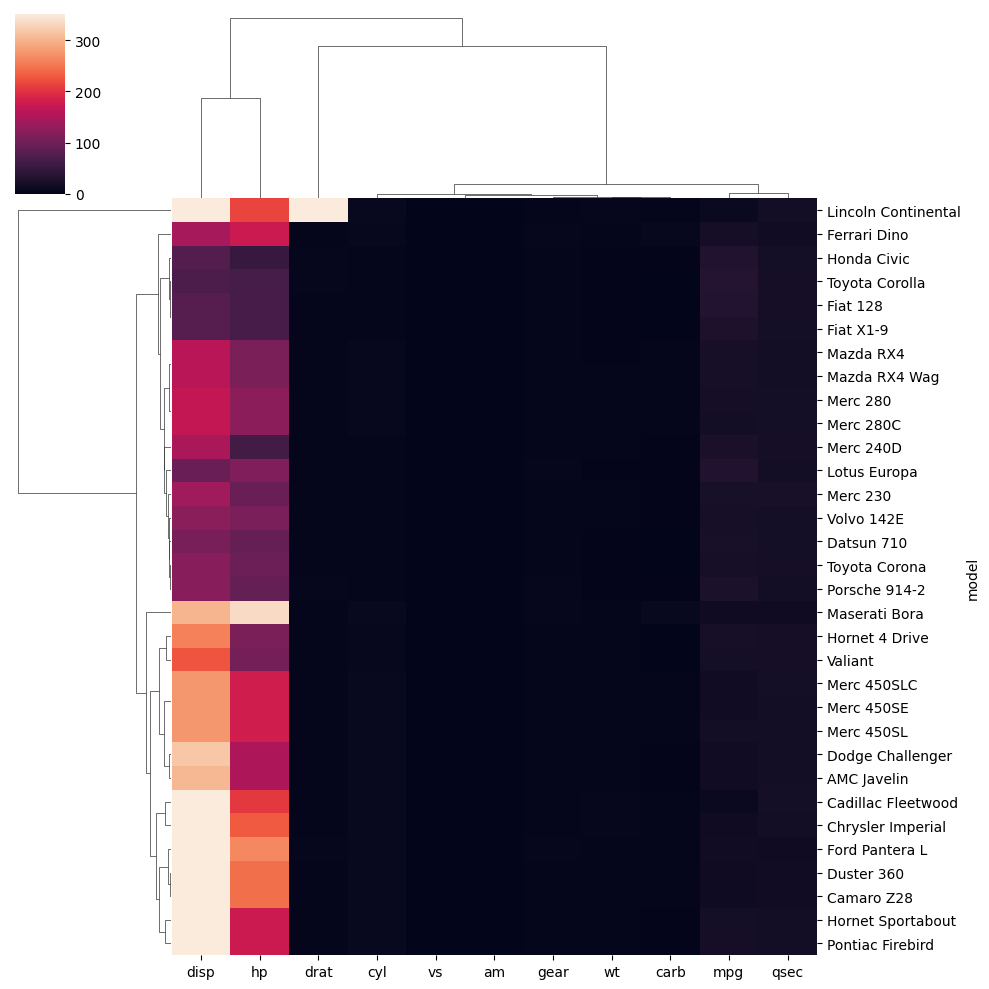

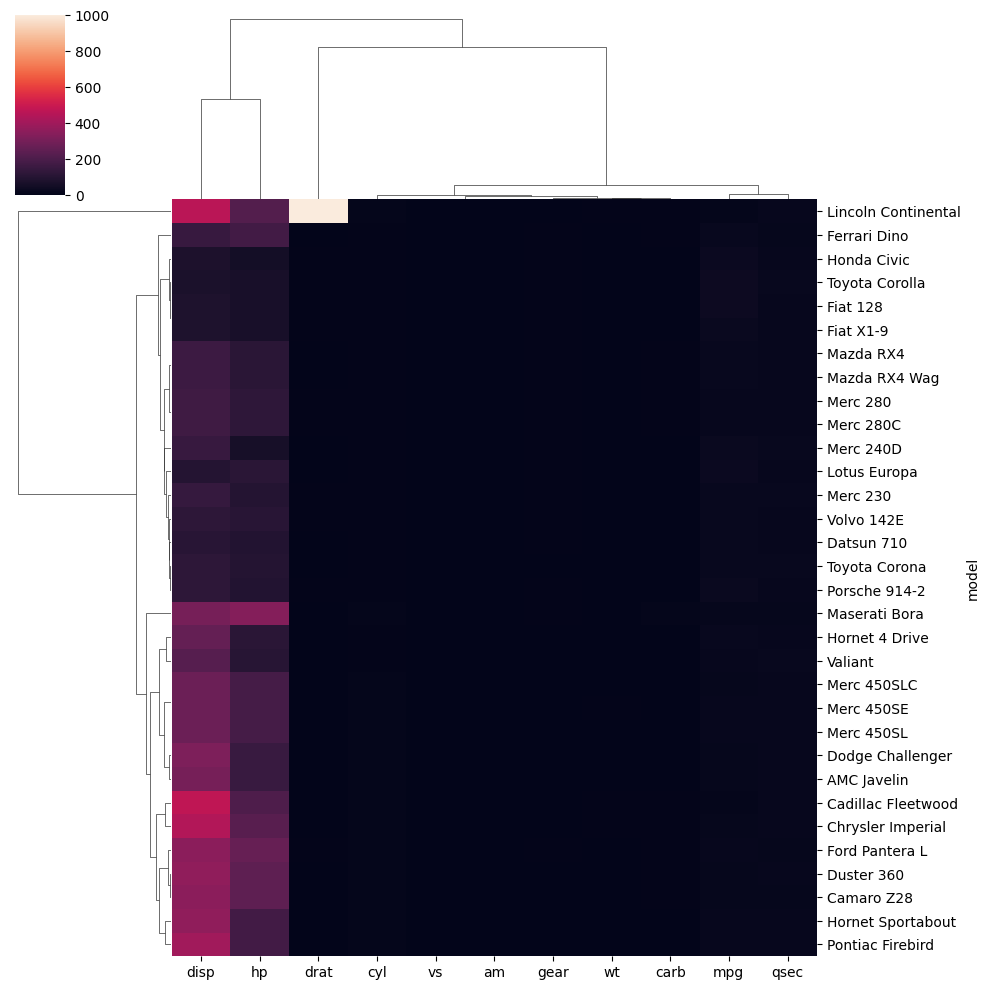

In [46]:
# 이상치 만들기
df['drat'].iloc[15:16] = 1000

# 이상치 찾아서 반영
sns.clustermap(df, robust=True)
plt.show()
 
# 이상치 반영 안하기
sns.clustermap(df, robust=False)
plt.show()

In [50]:
data = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/trentino_temperature.csv")

In [52]:
def single_plot(data, month, year, ax):
    data = data[(data["date"].dt.year == year) & (data["date"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = data["temp"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(24)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    
    # 수직 축 반전 아래가 0부터 24인걸 24부터 0으로
    ax.set_ylim(24, 0)

    # 축 눈금 세팅
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])

    # 길이 0인 눈금 제거
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # 축 제거
    ax.set_frame_on(False)

Text(0.5, 0.95, 'Hourly temperatures - Station T0001')

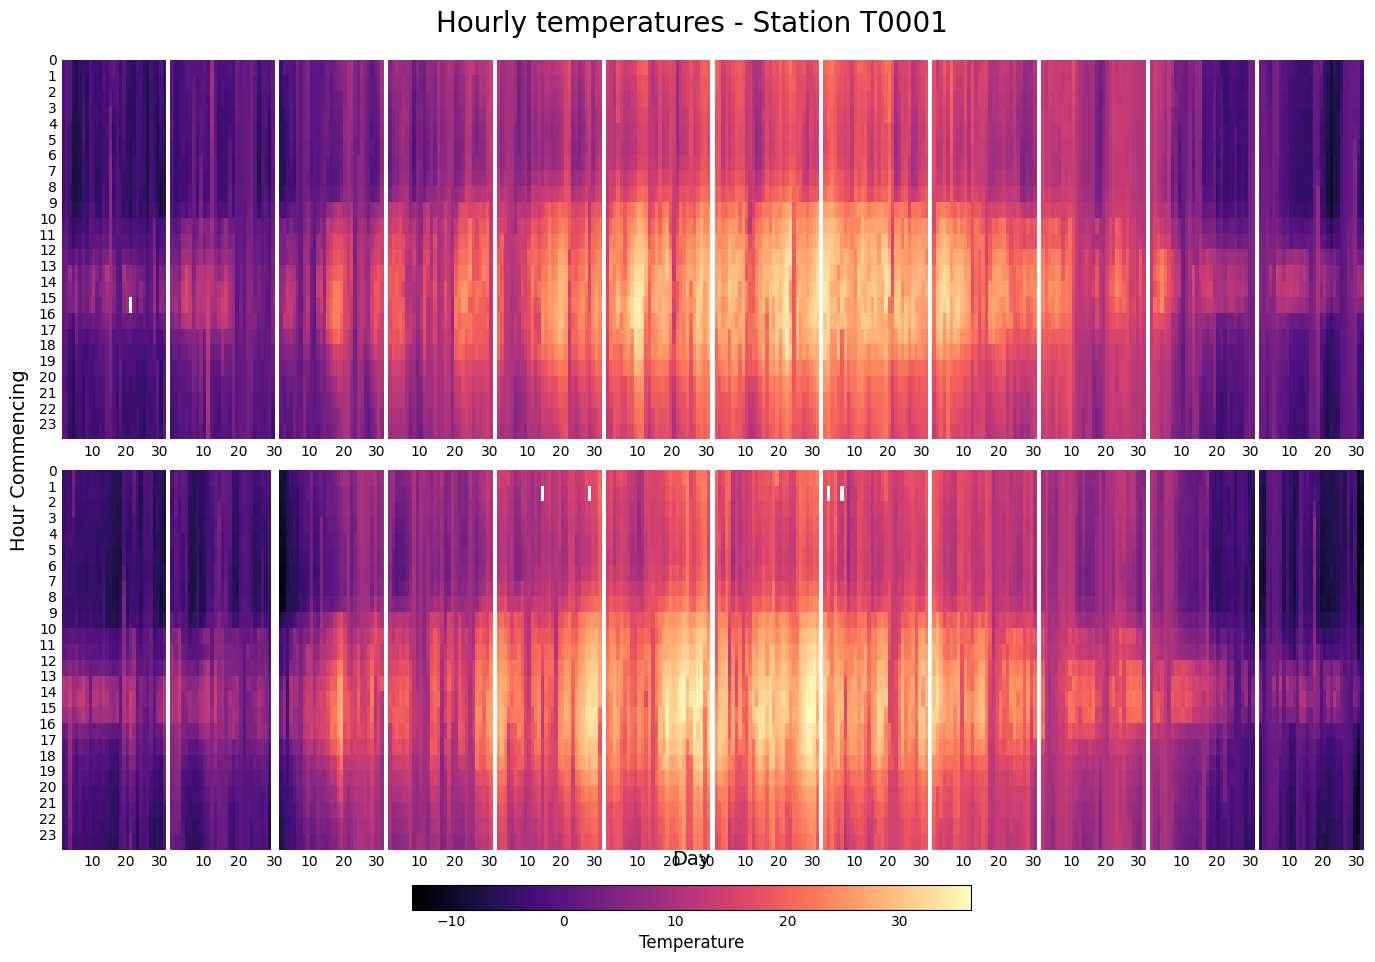

In [65]:
data["date"] = pd.to_datetime(data["date"])

subset = data[(data["date"].dt.year == 2004) & (data["date"].dt.month == 1)]

hour = subset["hour"]
day = subset["date"].dt.day
temp = subset["temp"]

temp = temp.values.reshape(24, len(day.unique()), order="F")

# 1부터 31까지 만듦
xgrid = np.arange(day.max() ) + 1

# 0시 - 23시
ygrid = np.arange(24)

MIN_TEMP = data["temp"].min()
MAX_TEMP = data["temp"].max()

# sharey --> share y y축을 공유하겠다는 뜻
fig, axes = plt.subplots(2, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2004, 2005]):
    for j, month in enumerate(range(1, 13)):
        single_plot(data, month, year, axes[i, j])

# 여백 만들기
fig.subplots_adjust(left=0.05, 
                    right=0.98, 
                    top=0.9, 
                    hspace=0.08, 
                    wspace=0.04)

# 컬러바 위치
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])

# 최저 최고 온도 정규화
norm = mc.Normalize(MIN_TEMP, MAX_TEMP)

# 컬러바 수평으로 만들기
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)


cb.ax.xaxis.set_tick_params(size=0)

cb.set_label("Temperature", size=12)

fig.text(0.5, 0.1, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour Commencing', ha="center", va="center", rotation="vertical", fontsize=14)

fig.suptitle("Hourly temperatures - Station T0001", fontsize=20, y=0.95)

In [66]:
path = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-26/plastics.csv"
data = pd.read_csv(path)
types_of_plastic = ["empty", "hdpe", "ldpe", "o", "pet", "pp", "ps", "pvc"]
total_by_company = (
    data
    .groupby(["parent_company", "year"], dropna=True)[types_of_plastic]
    .sum()
    .reset_index()
)

In [69]:
def get_top_n_data(data, n):
    # 2020년도만 필터링
    # 업체당 총 플라스틱 폐기물 계산
    top_data = (
        data
        .query("year == 2020")
        .melt(
            id_vars=["parent_company", "year"], 
            value_vars=types_of_plastic, 
            var_name="type"
        )
        .groupby("parent_company")["value"]
        .sum()
        .reset_index()
    )

    #  unbranded/unknown/error 케이스를 "Unbranded_unknown"로 변경
    top_data["parent_company"] = np.where(
        top_data["parent_company"].isin(["Unbranded", "null", "NULL", "#ERROR!"]), 
        "Unbranded_unknown",
        top_data["parent_company"]
    )

    # 플라스틱 폐기물 상위 기업 리스트 만들기
    top_companies = list(top_data.sort_values("value", ascending=False)["parent_company"][:n])

    # 회사 변수 통합
    # parent_company가 상위 기업 리스트에 있으면 parent_company로 되고 아니면 "Other"로 됨
    top_data["company_lumped"] = np.where(
        top_data["parent_company"].isin(top_companies),
        top_data["parent_company"],
        "Other"
    )

    top_data = top_data.drop_duplicates(["parent_company", "company_lumped"])
    top_data = top_data.merge(total_by_company, on="parent_company")

    top_data["total"] = top_data.loc[:, types_of_plastic[1:]].sum(axis=1)

    return top_data

In [70]:
def plot_heatmap(ax):
    for i, plastic in enumerate(types_of_plastic):
        d = top_thirty[top_thirty["type"] == plastic]

        y = d["company_lumped"]
        x = [i] * len(y)
        
        color = cmap(d["proportion"]) 
        
        ax.scatter(x, y, color=color, s=120)

    # 축 제거
    ax.set_frame_on(False)

    # 라인 투명도 설정
    ax.grid(alpha=0.4)

    # 라인들이 뒤로가게 하기
    ax.set_axisbelow(True)

    ax.set_xticks(np.arange(len(types_of_plastic)))
    ax.set_xticklabels(types_of_plastic)
    ax.tick_params(size=0, colors="0.3")

    ax.set_xlabel("Type of plastic", loc="right")

    y_shrunk = 0.75
    y_lower, y_upper = ax.get_ylim()
    ax.set_ylim(y_lower + y_shrunk, y_upper - y_shrunk)
    
    return ax

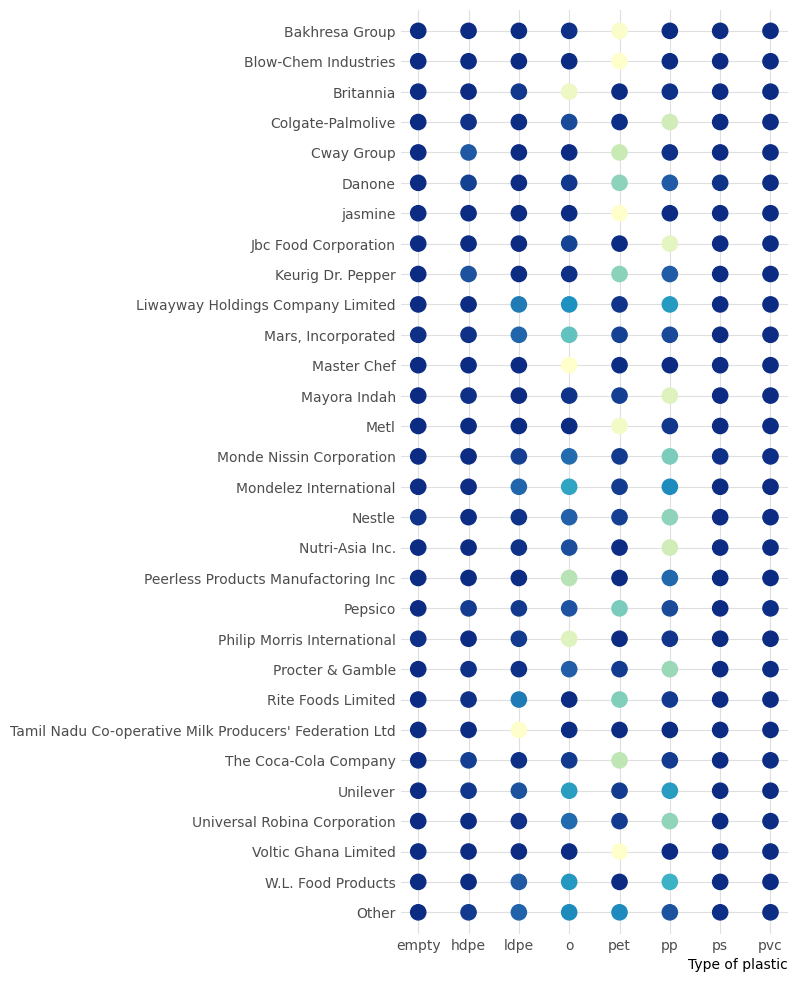

In [71]:
top_thirty = get_top_n_data(total_by_company, n=30)

top_thirty = (
    top_thirty
    .groupby("company_lumped")[types_of_plastic]
    .sum()
    .reset_index()
)

# 모든 유형의 플라스틱에 대한 플라스틱 폐기물의 합계가 있는 열을 추가
top_thirty["row_sum"] = top_thirty.loc[:, types_of_plastic].sum(axis=1)

# 각 플라스틱 유형의 폐기물을 총 폐기물로 나누어 각 플라스틱 유형의 폐기물 비율을 구함
top_thirty[types_of_plastic] = top_thirty[types_of_plastic].apply(lambda x: x / top_thirty["row_sum"])

top_thirty = top_thirty.melt(
    id_vars="company_lumped",  
    value_vars=types_of_plastic,
    var_name="type",
    value_name="proportion"
)

# 회사이름
categories = list(top_thirty["company_lumped"].unique())
# 소문자로 정렬
sorted_categories = sorted(categories, key=str.lower)
# Other 제거한 뒤에 맨 뒤에 추가
sorted_categories.remove("Other")
sorted_categories.append("Other")

top_thirty["company_lumped"] = pd.Categorical(
    top_thirty["company_lumped"], 
    categories=sorted_categories, 
    ordered=True
)

# 마지막 정렬
top_thirty = top_thirty.sort_values("company_lumped", ascending=False)

# 색깔 정의
COLORS = ["#0C2C84", "#225EA8", "#1D91C0", "#41B6C4", "#7FCDBB", "#C7E9B4", "#FFFFCC"]
# Create colormap
cmap = mc.LinearSegmentedColormap.from_list("colormap", COLORS, N=256)

fig, ax = plt.subplots(figsize=(5, 12))
plot_heatmap(ax)

In [72]:
def style_polar_axis(ax):
    # Change the initial location of the 0 in radians
    ax.set_theta_offset(np.pi / 2)
    
    # Move in clock-wise direction 
    ax.set_theta_direction(-1)

    # Remove all spines
    ax.set_frame_on(False)

    # Don't use tick labels for radial axis
    ax.set_xticklabels([])
    
    # Set limits for y axis
    ax.set_ylim([0, 4.5])
    # Set ticks for y axis. These determine the grid lines.
    ax.set_yticks([0, 1, 2, 3, 4, 4.5])
    # But don't use tick labels
    ax.set_yticklabels([])
    
    # Set grid with some transparency
    ax.grid(alpha=0.4)

    return ax

def add_labels_polar_axis(ax, color):
    # Define the characteristics of the bbox behind the text we add
    bbox_dict = {
        "facecolor": "w", "edgecolor": color, "linewidth": 1, 
        "boxstyle": "round", "pad": 0.15
    }
    types_of_plastic = ["hdpe", "ldpe", "o", "pet", "pp"]
    # Iterate over types of plastics and add the labels
    for idx, plastic in enumerate(types_of_plastic):
        ax.text(
            0, idx, plastic, color=color, ha="center", va="center",
            fontsize=11, bbox=bbox_dict
        )
    return ax

def plot_circular(axes):
    axes_flattened = axes.ravel()
    companies = top_seven["company_lumped"].unique()
    
    # Iterate over companies and plots
    for i, company in enumerate(companies):
        # Select data for the given company
        d = top_seven[top_seven["company_lumped"] == company]
        
        # Select plot
        ax = axes_flattened[i]
        
        # Only for the first panel, add label for vertical axis
        if i == 0:
            ax.set_ylabel("Type of plastic", loc="top")
        
        # Adjust style of the plot
        ax = style_polar_axis(ax)
        
        # Multiply the proportion by the 2pi, the complete rotation 
        proportions = d["prop"].values * (2 * np.pi)
        
        # Positions for the lines on the radial
        y_pos = np.arange(len(proportions))
        
        # Construct the line for each type of plastic creating a grid for the x and y values
        x = np.linspace(0, proportions, num=200)
        y = np.vstack([y_pos] * 200)

        # Select color
        color = COMPANY_PALETTES[i]
        
        # And finally, plot the rounded lines
        ax.plot(x, y, lw=6, color=color, solid_capstyle="round")
        
        # Add title
        ax.set_title(company, pad=10, color="0.3")
        
        # Add labels on top of the lines
        ax = add_labels_polar_axis(ax, color)
    return axes

In [73]:
# 원 그래프

COMPANY_PALETTES = ["#81C4CA", "#468D96", "#103128", "#E83D5F", "#FA6E90", "#FCB16D"]

top_seven = get_top_n_data(total_by_company, n=7)

# Unpivot data
top_seven = top_seven.melt(
    id_vars="company_lumped",  
    value_vars=types_of_plastic,
    var_name="type",
    value_name="amount"
)

# Drop entries where company is unbranded/unknown or other
top_seven = top_seven[~top_seven["company_lumped"].isin(["Unbranded_unknown", "Other"])]

# Drop entries where plastyic type is either "ps", "pvc", or "empty"
top_seven = top_seven[~top_seven["type"].isin(["ps", "pvc", "empty"])]

# For each company and type of plastic, compute the sum of plastic waste
top_seven = top_seven.groupby(["company_lumped", "type"]).sum().reset_index()

# Rename "amount" to "total"
top_seven = top_seven.rename({"amount": "total"}, axis=1)

# Compute the proportion of plastic waste for each type within each company
top_seven["prop"] = top_seven["total"] / top_seven.groupby("company_lumped")["total"].transform("sum")

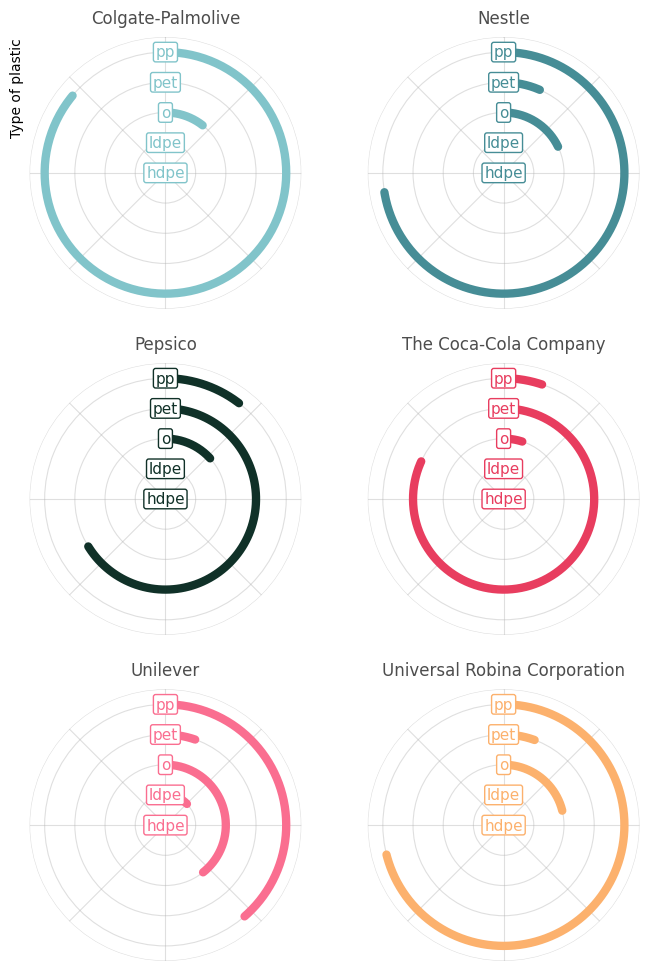

In [74]:
# Initialize layout
fig, axes = plt.subplots(3, 2, figsize=(8, 12), subplot_kw={"projection": "polar"})

# Create chart! 
axes = plot_circular(axes)

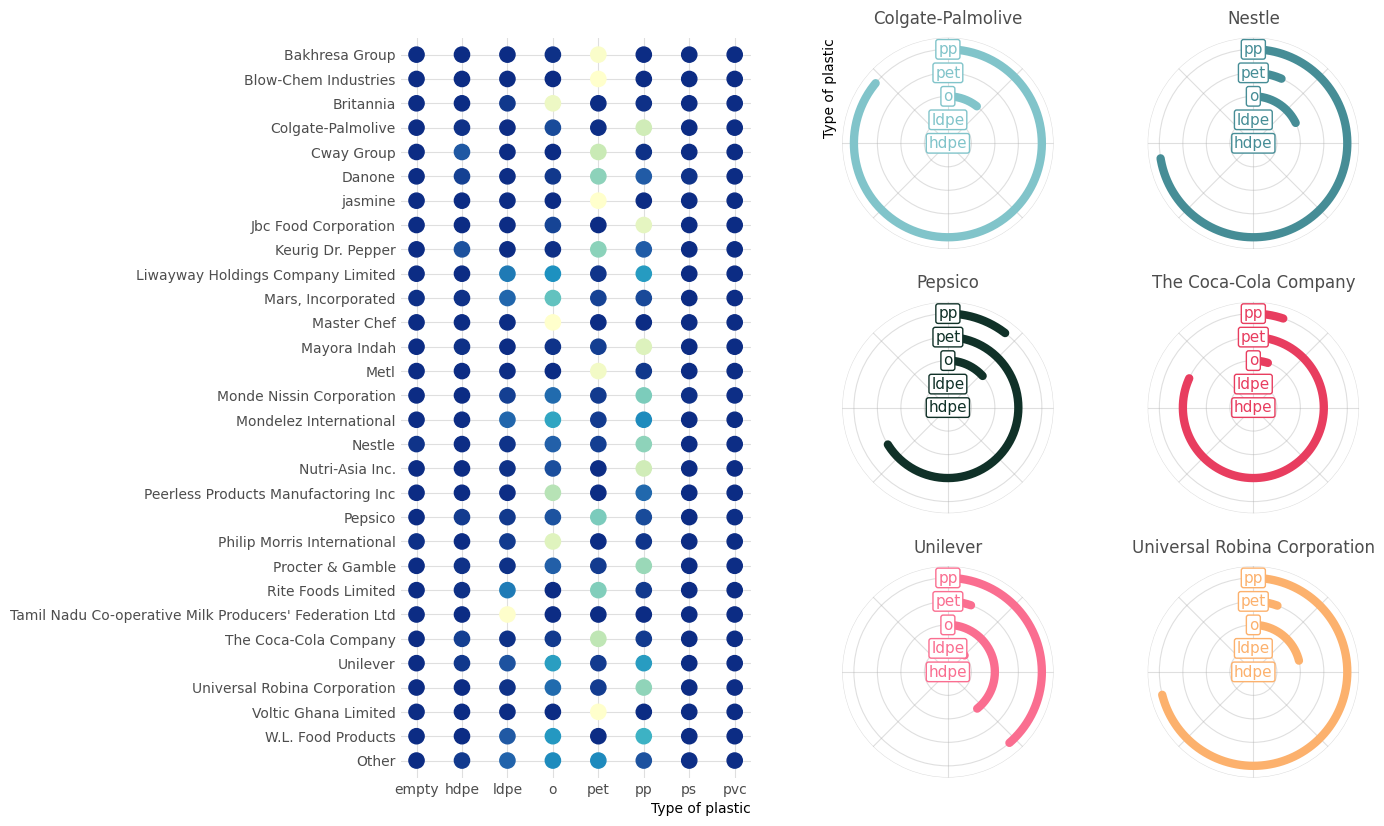

In [76]:
# Create figure
fig = plt.figure(figsize=(14, 10))

# Add first grid spec, for the heatmap
gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.25, right=0.5, top=0.85)

# Add the subplot in the gridspec.
ax = fig.add_subplot(gs1[0])

# With the axis returned, plot the heatmap
plot_heatmap(ax)

# Create an empty list to hold the six axes
axes = []
# Add second gridspec. 
gs2 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.95, hspace=0.25, top=0.85)
# Add all the six axes to the figure, appending the returned axis to the 'axes' list
for gs in gs2:
    axes.append(fig.add_subplot(gs, projection="polar"))

# Convert the list into an array
axes = np.array(axes)

# And now plot the circular barplots
plot_circular(axes)

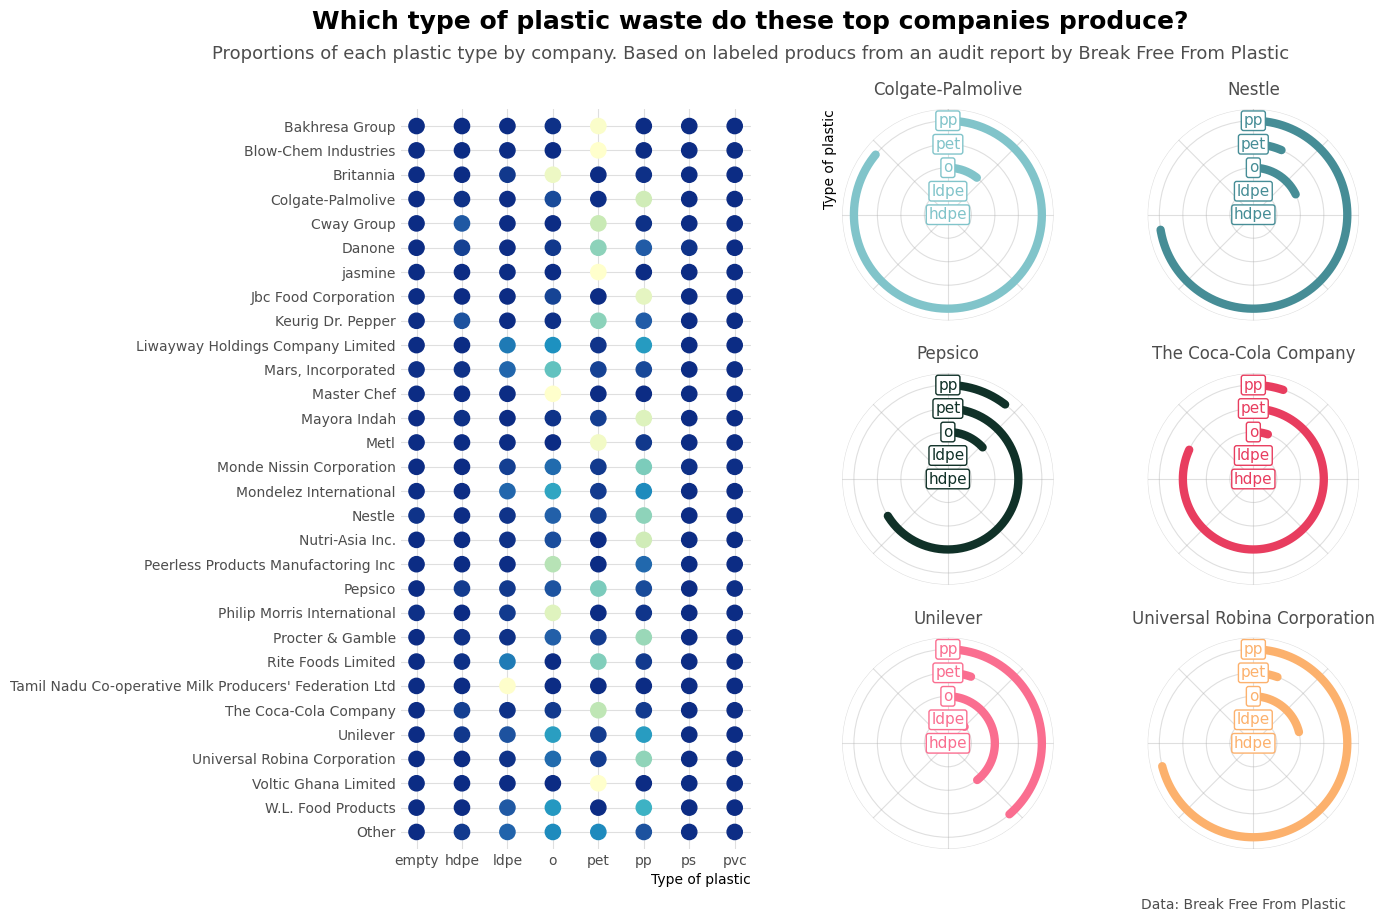

In [77]:
# Add title
fig.text(
    0.5, 0.93, "Which type of plastic waste do these top companies produce?",
    ha="center", va="baseline", size=18, weight="bold"
)

# Add subtitle
fig.text(
    0.5, 0.9, 
    "Proportions of each plastic type by company. Based on labeled producs from an audit report by Break Free From Plastic",
    ha="center", va="baseline", size=13, color="0.3"
)

# Add caption
fig.text(0.925, 0.05, "Data: Break Free From Plastic", color="0.3", ha="right")
fig.set_facecolor("w")

# Print figure
fig
#fig.savefig("plot.png", dpi=300) # if you want to save in high-quality ;)

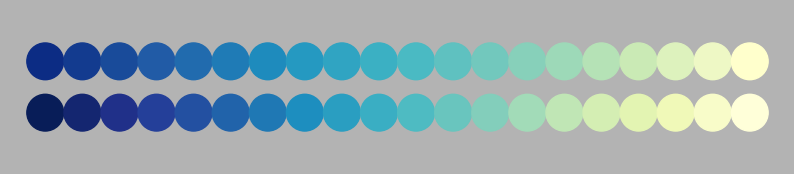

In [79]:
cmap_mpl = plt.get_cmap("YlGnBu")
cmap_mpl = cmap_mpl.reversed()
fig, ax = plt.subplots(figsize = (10, 2))

x = np.linspace(0, 1, num=20)
ax.set_ylim(-3, 3)
ax.scatter(x, [1] * 20, color=cmap(x), s=700)
ax.scatter(x, [-1] * 20, color=cmap_mpl(x), s=700)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor("0.7")
fig.set_facecolor("0.7")